In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 4.1MB/s 


In [ ]:
import kerastuner as kt

# Classifying bank customers based on their previous bank activities, that they will exit/leave the bank or not

# **
AIM:

Goal is to make an Artificial Neural Network that can predict, based on geo-demographical and transactional information given above, if any individual customer will leave the bank or stay (customer churn). Also, rank all the customers of the bank, based on their probability of leaving.

Dataset Datails:

This Dataset contains 14 columns which are information regarding customers including our target varible.During a period of 6 months, the bank observed if these customers left or stayed in the bank.

In [ ]:
#importing libraries numpy for mathematical computation
#and pandas for managing dataset


import numpy as np
import pandas as pd

In [ ]:
# Reading dataset

df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

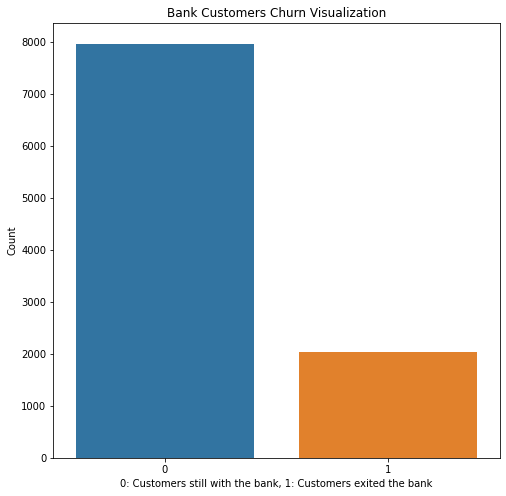

In [ ]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [ ]:
# checking if their is any null values in data

df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
# Dropping the columns which are not needed in analysis

df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [ ]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [ ]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Building Artificial Neural Network(ANN):**
ANN is the main tool used in machine  learning .It is similar to the neural network of human being .In ANN we mainly have 3 layers :input layer,hidden layer and output layer. We can have more then one hiden layer. Input layer is connected to hidden layer by weights and in hidden layer the input get multiplied by weight and bias is added and then it will get pass through activation function .this process happens for each neuron in hidden layers until output layer is reached.

Output layer gives us our y_predicted value . We calculate the loss by comparing actual value and predicted value . Loss should always be less .

In order to minimize the loss ,we backpropagate and in backpropagation our weight is adjusted in such a way that our loss should be mininmum .
The network propagate forward and backward until our loss is minimum.


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [ ]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [ ]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [ ]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 15s 3ms/step - loss: 0.5571 - accuracy: 0.7536 - val_loss: 0.4715 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4750 - accuracy: 0.7866 - val_loss: 0.4590 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4474 - accuracy: 0.7946 - val_loss: 0.4492 - val_accuracy: 0.7914
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4313 - accuracy: 0.8023 - val_loss: 0.4448 - val_accuracy: 0.8008
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4336 - accuracy: 0.8027 - val_loss: 0.4414 - val_accuracy: 0.8001
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4318 - accuracy: 0.8032 - val_loss: 0.4394 - val_accuracy: 0.8088
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4356 - accuracy: 0.8091 - val_loss: 0.4380 - val_accuracy: 0.809

In [ ]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

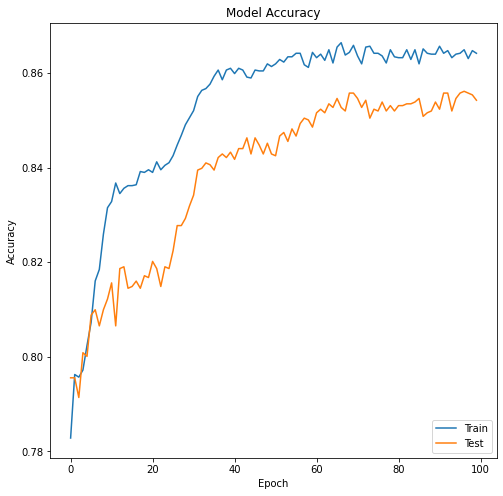

In [ ]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

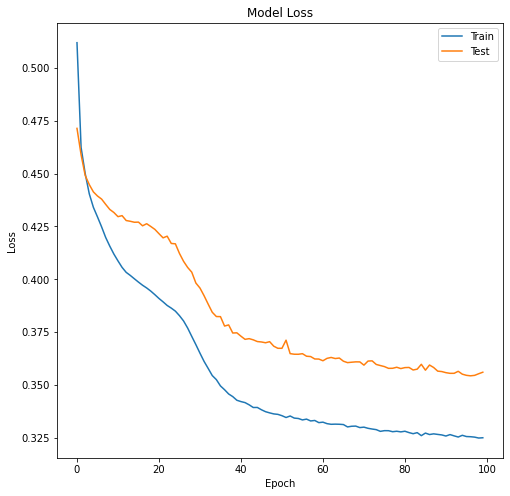

In [ ]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([[0.30718964],
       [0.30036622],
       [0.22077361],
       ...,
       [0.38456544],
       [0.19732311],
       [0.29102033]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 191,  214]])

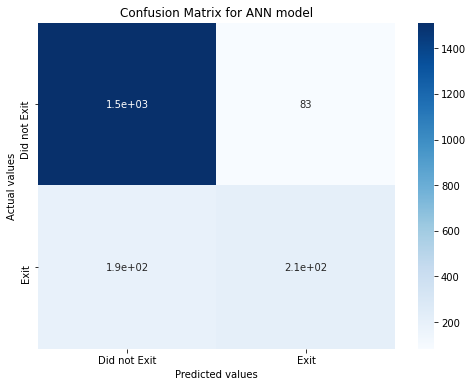

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))


The accuracy for ANN model is: 86.3%


In [ ]:
# predictions

def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [ ]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

Prediction: Low chance of exit.


In [ ]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High chance of exit!')
else:
  print('Prediction: Low chance of exit.')

Prediction: High chance of exit!
